<h1 style="color:#daae1f;font-size: 60px;font-weight:bolder"> <center> Nutriscore </center></h1>

<a href="https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21">Medium</a>

L'agence **"Santé publique France"** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.



**Les données**

Extrait de l'appel à projets :

Le jeu de données **Open Food Fact** est disponible sur le site officiel https://world.openfoodfacts.org/. Les variables sont définies à cette adresse https://world.openfoodfacts.org/data/data-fields.txt

Les champs sont séparés en quatre sections :

* Les informations générales sur la fiche du produit : nom, date de modification, etc.
* Un ensemble de tags : catégorie du produit, localisation, origine, etc.
* Les ingrédients composant les produits et leurs additifs éventuels.
* Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

** Votre mission **

Après avoir lu l’appel à projets, voici les différentes étapes que vous avez identifiées :

1) Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations.
(**Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple).**)

2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.
(**L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.**)

3) Élaborer une idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

## Documents 

* Graphique : https://www.psiweb.org/docs/default-source/2018-psi-conference-posters/48-julie-jones.pdf
* Missingno : https://github.com/ResidentMario/missingno

## Cours

* Décrivez et nettoyez votre jeu de données : https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees

* Réalisez une analyse exploratoire de données : https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees

<h2 style="color:#daae1f;font-size: 30px;font-weight:bolder">Nettoyage</h2>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [4]:
data = pd.read_csv("Data\products.csv", sep="\t", header=0, encoding='utf-8',low_memory=False)

In [5]:
print(f"Le dataset 'Nutriscore' comporte {data.shape[0]} lignes et {data.shape[1]} colonnes")

Le dataset 'Nutriscore' comporte 2033614 lignes et 187 colonnes


In [6]:
data.head()

code                                                url  \
0     00000000000000225  http://world-en.openfoodfacts.org/product/0000...   
1  00000000000003429145  http://world-en.openfoodfacts.org/product/0000...   
2         0000000000017  http://world-en.openfoodfacts.org/product/0000...   
3         0000000000031  http://world-en.openfoodfacts.org/product/0000...   
4    000000000003327986  http://world-en.openfoodfacts.org/product/0000...   

          creator   created_t      created_datetime  last_modified_t  \
0  nutrinet-sante  1623855208  2021-06-16T14:53:28Z       1623855209   
1         kiliweb  1630483911  2021-09-01T08:11:51Z       1630484064   
2         kiliweb  1529059080  2018-06-15T10:38:00Z       1561463718   
3        isagoofy  1539464774  2018-10-13T21:06:14Z       1539464817   
4         kiliweb  1574175736  2019-11-19T15:02:16Z       1624390765   

  last_modified_datetime               product_name abbreviated_product_name  \
0   2021-06-16T14:53:29Z             jeunes pousses                      NaN   
1   2021-09-01T08:14:24Z                    L.casei                      NaN   
2   2019-06-25T11:55:18Z           Vitória crackers                      NaN   
3   2018-10-13T21:06:57Z                      Cacao                      NaN   
4   2021-06-22T19:39:25Z  Filetes de pollo empanado                      NaN   

  generic_name  ... carbon-footprint-from-meat-or-fish_100g  \
0          NaN  ...                                     NaN   
1          NaN  ...                                     NaN   
2          NaN  ...                                     NaN   
3          NaN  ...                                     NaN   
4          NaN  ...                                     NaN   

  nutrition-score-fr_100g nutrition-score-uk_100g glycemic-index_100g  \
0                     NaN                     NaN                 NaN   
1                     NaN                     NaN                 NaN   
2                     NaN                     NaN                 NaN   
3                     NaN                     NaN                 NaN   
4                     NaN                     NaN                 NaN   

  water-hardness_100g choline_100g phylloquinone_100g beta-glucan_100g  \
0                 NaN          NaN                NaN              NaN   
1                 NaN          NaN                NaN              NaN   
2                 NaN          NaN                NaN              NaN   
3                 NaN          NaN                NaN              NaN   
4                 NaN          NaN                NaN              NaN   

  inositol_100g carnitine_100g  
0           NaN            NaN  
1           NaN            NaN  
2           NaN            NaN  
3           NaN            NaN  
4           NaN            NaN  

[5 rows x 187 columns]

In [7]:
data.describe(include="all")

code                                                url  \
count         2033614                                            2033614   
unique        2033599                                            2033600   
top     6703501220017  http://world-en.openfoodfacts.org/product/3184...   
freq                2                                                  2   
mean              NaN                                                NaN   
std               NaN                                                NaN   
min               NaN                                                NaN   
25%               NaN                                                NaN   
50%               NaN                                                NaN   
75%               NaN                                                NaN   
max               NaN                                                NaN   

        creator     created_t      created_datetime  last_modified_t  \
count   2033610  2.033614e+06               2033614     2.033614e+06   
unique    14690           NaN               1780469              NaN   
top     kiliweb           NaN  2020-04-23T17:22:07Z              NaN   
freq    1187498           NaN                    28              NaN   
mean        NaN  1.561755e+09                   NaN     1.596792e+09   
std         NaN  5.355299e+07                   NaN     3.166427e+07   
min         NaN  1.328021e+09                   NaN     1.333873e+09   
25%         NaN  1.525015e+09                   NaN     1.583169e+09   
50%         NaN  1.572458e+09                   NaN     1.601375e+09   
75%         NaN  1.606306e+09                   NaN     1.620986e+09   
max         NaN  1.637115e+09                   NaN     1.637115e+09   

       last_modified_datetime product_name           abbreviated_product_name  \
count                 2033614      1950747                               7181   
unique                1595563      1265059                               7056   
top      2021-09-02T17:25:05Z         Miel  4 x 33cl - Coffret cadeau Ninkasi   
freq                      213         1356                                  5   
mean                      NaN          NaN                                NaN   
std                       NaN          NaN                                NaN   
min                       NaN          NaN                                NaN   
25%                       NaN          NaN                                NaN   
50%                       NaN          NaN                                NaN   
75%                       NaN          NaN                                NaN   
max                       NaN          NaN                                NaN   

                                    generic_name  ...  \
count                                     121619  ...   
unique                                     87902  ...   
top     Pâtes alimentaires de qualité supérieure  ...   
freq                                         289  ...   
mean                                         NaN  ...   
std                                          NaN  ...   
min                                          NaN  ...   
25%                                          NaN  ...   
50%                                          NaN  ...   
75%                                          NaN  ...   
max                                          NaN  ...   

       carbon-footprint-from-meat-or-fish_100g nutrition-score-fr_100g  \
count                             11911.000000           726017.000000   
unique                                     NaN                     NaN   
top                                        NaN                     NaN   
freq                                       NaN                     NaN   
mean                                612.776108                9.110962   
std                                6070.829678                8.847891   
min                                   0.049000              -15

In [8]:
# calcul du taux de valeurs manquantes dans le data set
(data.isna().sum().sort_values() / data.shape[0]) * 100

code                                   0.0
url                                    0.0
created_t                              0.0
created_datetime                       0.0
last_modified_t                        0.0
                                     ...  
-melissic-acid_100g                  100.0
-cerotic-acid_100g                   100.0
-lignoceric-acid_100g                100.0
-dihomo-gamma-linolenic-acid_100g    100.0
-montanic-acid_100g                  100.0
Length: 187, dtype: float64

In [9]:
data.isnull().sum().sort_values()

code                                       0
url                                        0
created_t                                  0
created_datetime                           0
last_modified_t                            0
                                      ...   
-melissic-acid_100g                  2033614
-cerotic-acid_100g                   2033614
-lignoceric-acid_100g                2033614
-dihomo-gamma-linolenic-acid_100g    2033614
-montanic-acid_100g                  2033614
Length: 187, dtype: int64

<p style="color:#daae1f;font-size: 16px">On remarque que les données sont très volumineuses. Il est donc important de faire attention à la taille des données et de les nettoyer.
Pour commencer, on peut voir ci-dessus que certaines colonnes sont inutiles dues à un trop grand nombre de données manquantes.</s>

In [10]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033614 entries, 0 to 2033613
Data columns (total 187 columns):
 #    Column                                                 Non-Null Count    Dtype  
---   ------                                                 --------------    -----  
 0    code                                                   2033614 non-null  object 
 1    url                                                    2033614 non-null  object 
 2    creator                                                2033610 non-null  object 
 3    created_t                                              2033614 non-null  int64  
 4    created_datetime                                       2033614 non-null  object 
 5    last_modified_t                                        2033614 non-null  int64  
 6    last_modified_datetime                                 2033614 non-null  object 
 7    product_name                                           1950747 non-null  object 
 8    abbreviate

In [11]:
def analyse_donnees_manquantes(df, seuil = .8):
    nb_rows, nb_cols = df.shape

    nb_col_many_nulls = (((df.isnull().sum()) / nb_rows) > seuil)

    percentage_col_many_nulls = round(((nb_col_many_nulls.sum()) / nb_cols) * 100, 2)

    message = ( 
        f"{percentage_col_many_nulls} % des colonnes ont >= {seuil*100:0.0f}% de données manquantes \n"  
        f"Ces colonnes sont : \n"
        f"{nb_col_many_nulls[nb_col_many_nulls].to_string()}"
    )

    print(message)

In [12]:
analyse_donnees_manquantes(data)

70.05 % des colonnes ont >= 80% de données manquantes 
Ces colonnes sont : 
abbreviated_product_name                      True
generic_name                                  True
packaging                                     True
packaging_tags                                True
packaging_text                                True
origins                                       True
origins_tags                                  True
origins_en                                    True
manufacturing_places                          True
manufacturing_places_tags                     True
emb_codes                                     True
emb_codes_tags                                True
first_packaging_code_geo                      True
cities                                        True
cities_tags                                   True
purchase_places                               True
stores                                        True
allergens                                     True
allerg

<h3 style="color:#daae1f;font-size: 20px;font-weight:bold">  <center> Représentation graphique des Nan <center/></h3>

In [13]:
msno.bar(data)

<AxesSubplot:>

<h3 style="color:#daae1f;font-size: 20px;font-weight: bold">  <center> Retrait sur un seuil de 40 % des NaN </center> <h3>

In [14]:
food = data.copy()

In [15]:
data.shape

(2033614, 187)

In [16]:
# Calcul du % de valeurs manquantes 
percent_na = 100 * (food.isna().sum() / food.shape[0])
PERCENT_NA_MAX = 40.0
# Slicing des colones inexploitables sauf nutriscore grade qui sera probablement nécessaire pour la suite
# cols = ['nutrition-score-fr_100g','nova_group','nutriscore_grade'] # col que l'on souhaite conversé et à exclure du process
food = food.loc[:, (percent_na <= PERCENT_NA_MAX) | (food.columns == 'nutriscore_grade') | (food.columns == 'nova_group' )|(food.columns == 'nutrition-score-fr_100g')]

In [17]:
food.shape

(2033614, 30)

<p style="color:#daae1f;font-size: 16px">Suppression de 159 colonnes , on va éliminer avec la même méthode les lignes comportant trop de NaN</p>

In [18]:
food.isna().sum(axis=1)/food.shape[1]*100

0          46.666667
1          16.666667
2          10.000000
3          40.000000
4          16.666667
             ...    
2033609    40.000000
2033610    46.666667
2033611    10.000000
2033612    10.000000
2033613    40.000000
Length: 2033614, dtype: float64

In [19]:
food['rows_empty'] = food.isna().sum(axis=1) / food.shape[1]*100
food = food.loc[food['rows_empty'] <= PERCENT_NA_MAX] # Suppression des lignes avec trop de NaN

In [20]:
food = food.drop(columns="rows_empty")

In [21]:
food.shape

(1895466, 30)

In [22]:
food['product_name'].fillna(value='Product name unavailable', inplace=True)

<p style="color:#daae1f;font-size: 16px">Après le nettoyage des colonnes, il ne nous reste plus que 29 colonnes utilisables.
Nous allons maintenant réduire nos nombres de lignes afin d'avoir un jeu de données le plus pertinant possible.</p>

<h3 style="color:#daae1f;font-size: 20px;font-weight:bold">  <center> Vérification des doublons </center> <h3>

In [23]:
food.duplicated('code').sum()

12

In [24]:
food[food.duplicated(keep=False)]

code                                                url  \
767779   31843340000818  http://world-en.openfoodfacts.org/product/3184...   
767780   31843340000818  http://world-en.openfoodfacts.org/product/3184...   
1505164   7071688002962  http://world-en.openfoodfacts.org/product/7071...   
1505165   7071688002962  http://world-en.openfoodfacts.org/product/7071...   
1659349   8008082903405  http://world-en.openfoodfacts.org/product/8008...   
1659350   8008082903405  http://world-en.openfoodfacts.org/product/8008...   

                            creator   created_t      created_datetime  \
767779   openfoodfacts-contributors  1629142841  2021-08-16T19:40:41Z   
767780   openfoodfacts-contributors  1629142841  2021-08-16T19:40:41Z   
1505164                       odinh  1625738478  2021-07-08T10:01:18Z   
1505165                       odinh  1625738478  2021-07-08T10:01:18Z   
1659349                 telperion87  1631025916  2021-09-07T14:45:16Z   
1659350                 telperion87  1631025916  2021-09-07T14:45:16Z   

         last_modified_t last_modified_datetime               product_name  \
767779        1629182103   2021-08-17T06:35:03Z       poudre à lever Pural   
767780        1629182103   2021-08-17T06:35:03Z       poudre à lever Pural   
1505164       1626186395   2021-07-13T14:26:35Z        Tortilla Fyldig Ost   
1505165       1626186395   2021-07-13T14:26:35Z        Tortilla Fyldig Ost   
1659349       1631049221   2021-09-07T21:13:41Z  Melanzane alla parmigiana   
1659350       1631049221   2021-09-07T21:13:41Z  Melanzane alla parmigiana   

        countries countries_tags  ... energy-kcal_100g energy_100g  fat_100g  \
767779     France      en:france  ...              NaN         NaN       0.0   
767780     France      en:france  ...              NaN         NaN       0.0   
1505164    Norway      en:norway  ...            523.0      2188.0      26.0   
1505165    Norway      en:norway  ...            523.0      2188.0      26.0   
1659349     Italy       en:italy  ...            149.0       623.0      12.0   
1659350     Italy       en:italy  ...            149.0       623.0      12.0   

        saturated-fat_100g carbohydrates_100g sugars_100g proteins_100g  \
767779                 NaN               44.0         0.0           0.0   
767780                 NaN               44.0         0.0           0.0   
1505164                3.1               61.0         2.2           8.0   
1505165                3.1               61.0         2.2           8.0   
1659349                2.8                5.5         2.3           3.8   
1659350                2.8                5.5         2.3           3.8   

        salt_100g sodium_100g nutrition-score-fr_100g  
767779      17.50       7.000                     NaN  
767780      17.50       7.000                     NaN  
1505164      1.20       0.480                    14.0  
1505165      1.20       0.480                    14.0  
1659349      0.98       0.392                     1.0  
1659350      0.98       0.392                     1.0  

[6 rows x 30 columns]

In [25]:
food.shape

(1895466, 30)

In [26]:
food['code'].nunique()

1895454

In [27]:
# Suppression doublon sur la colonne code 
food['code'].drop_duplicates(inplace=True)

<h3 style="color:#daae1f;font-size: 20px;font-weight:bold">  <center> Choix du pays de l'étude : France </center> <h3>

In [28]:
food['countries_tags'].value_counts()

en:france                                                                 736585
en:united-states                                                          370733
en:spain                                                                  209900
en:italy                                                                  114677
en:germany                                                                 72300
                                                                           ...  
en:france,en:germany,en:united-kingdom,fr:frankreich                           1
en:czech-republic,en:greece,en:hungary,en:ireland,en:romania,en:sweden         1
en:austria,en:greece,en:romania                                                1
en:denmark,en:romania,en:slovakia,en:sweden                                    1
en:bulgaria,en:cyprus,en:czech-republic,en:greece                              1
Name: countries_tags, Length: 4243, dtype: int64

<p style="color:#daae1f;font-size: 20px">Premier constat des lignes contiennent plusieurs pays si on souhaite le nombre exacte il faudra split </p>

In [29]:
food = food.dropna(subset=['countries_tags'])
fr_tags = food['countries_tags'].str.split(',')

df_french_data = food.loc[fr_tags.str.contains('en:france', regex=False)]

print(f"df_french : {df_french_data.shape} et data_clear : {food.shape}")

df_french : (806775, 30) et data_clear : (1892851, 30)


<p style="color:#daae1f;font-size: 16px">Au vu de l'objectif de création d'un jeu de données pour une application française, nous décidons de ne garder que les produits vendues sur le territoire français.
Ici lors du split , prise en compte seule de FRANCE et non des autres traduction ou possible erreur de typo ,des Dom  / Tom 
</p>


<h3 style="color:#daae1f;font-size: 20px;font-weight:bold">  <center> Vérification des types </center> <h3>

In [30]:
df_french_data.dtypes

code                        object
url                         object
creator                     object
created_t                    int64
created_datetime            object
last_modified_t              int64
last_modified_datetime      object
product_name                object
countries                   object
countries_tags              object
countries_en                object
nutriscore_grade            object
nova_group                 float64
pnns_groups_1               object
pnns_groups_2               object
states                      object
states_tags                 object
states_en                   object
image_url                   object
image_small_url             object
energy-kcal_100g           float64
energy_100g                float64
fat_100g                   float64
saturated-fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
proteins_100g              float64
salt_100g                  float64
sodium_100g         

In [31]:
df_french_data['created_datetime'] = pd.to_datetime(df_french_data['created_datetime'])

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_5256/4140491563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_french_data['created_datetime'] = pd.to_datetime(df_french_data['created_datetime'])


In [32]:
df_french_data['last_modified_datetime'] = pd.to_datetime(df_french_data['last_modified_datetime'])

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_5256/769967326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_french_data['last_modified_datetime'] = pd.to_datetime(df_french_data['last_modified_datetime'])


In [33]:
df_french_data[['created_datetime', 'last_modified_datetime']].isnull().sum()

created_datetime          0
last_modified_datetime    0
dtype: int64

In [34]:
#Fillna sur les dates manquantes
df_french_data['created_datetime'].fillna(method='ffill', inplace=True)
df_french_data['last_modified_datetime'].fillna(method='ffill', inplace=True)

C:\Users\utilisateur\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<h3 style="color:#daae1f;font-size: 20px;font-weight:bold">  <center> Recherche et nettoyage des valeurs Abberantes , Atypiques , Outliers </center> <h3>

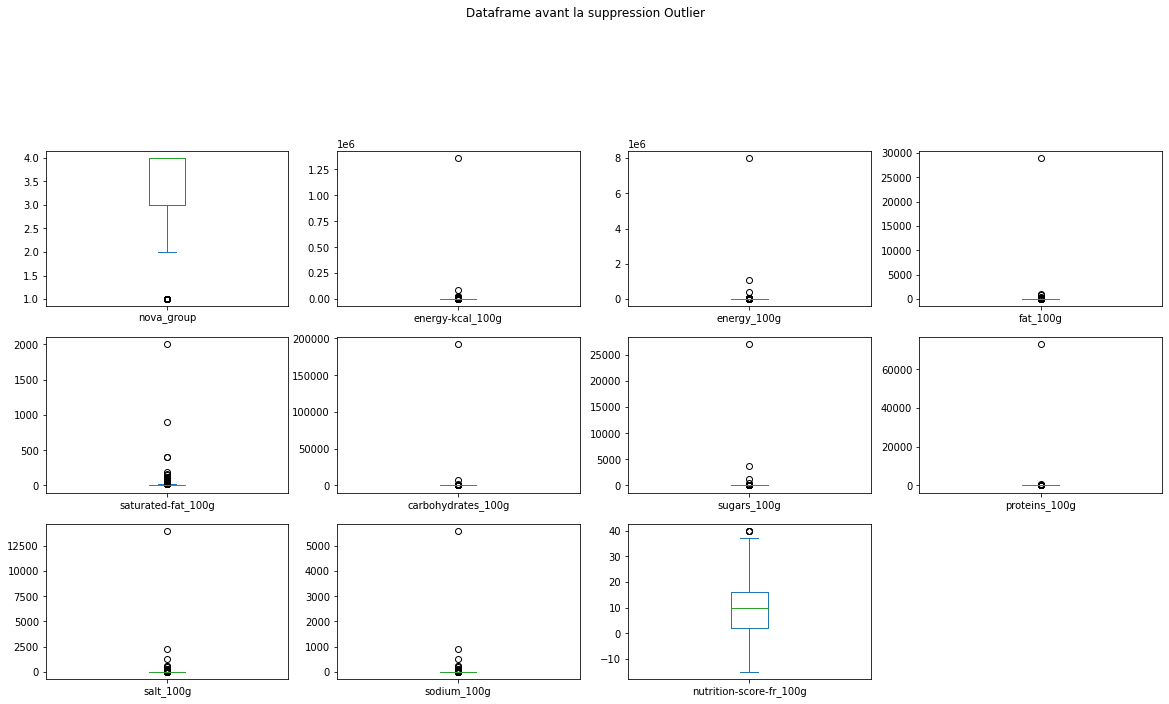

In [35]:
df_french_data.select_dtypes(include=float).plot(kind='box', subplots=True, title='Dataframe avant la suppression Outlier', figsize=(20,20), layout=(6,4))
plt.show()

In [36]:
food_at = df_french_data.copy() 

In [37]:
food_at.isna().sum()

code                            0
url                             0
creator                         1
created_t                       0
created_datetime                0
last_modified_t                 0
last_modified_datetime          0
product_name                    0
countries                       0
countries_tags                  0
countries_en                    0
nutriscore_grade           498045
nova_group                 592708
pnns_groups_1                   1
pnns_groups_2                   0
states                          0
states_tags                     0
states_en                       0
image_url                   49632
image_small_url             49632
energy-kcal_100g           172007
energy_100g                146301
fat_100g                   152160
saturated-fat_100g         148354
carbohydrates_100g         152211
sugars_100g                148726
proteins_100g              150339
salt_100g                  170342
sodium_100g                170343
nutrition-scor

In [38]:
def outliers_aberrante(df, col):
    return df[(df[col]> 0)&(df[col]< 100)]

def outliers_iqr(df, col):
    q1, q3 = np.nanpercentile(df[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)

    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

list_col = [ 'fat_100g', 'saturated-fat_100g',
    'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
    'salt_100g', 'sodium_100g']

food_at=food_at[(food_at['energy_100g']> 0)&(food_at['energy_100g']< 3700)]
food_at=food_at[(food_at['energy-kcal_100g']> 0)&(food_at['energy-kcal_100g']< 3700)]

for col in list_col:
    food_at= outliers_aberrante(food_at, col)

food_at = outliers_iqr(food_at , 'energy_100g')
food_at = outliers_iqr(food_at , 'energy-kcal_100g')


for col in list_col:
    food_at= outliers_iqr(food_at, col)

food_at.describe()

created_t  last_modified_t     nova_group  energy-kcal_100g  \
count  3.380510e+05     3.380510e+05  106422.000000     338051.000000   
mean   1.538101e+09     1.592518e+09       3.572241        272.782358   
std    4.901115e+07     3.200270e+07       0.822189        159.710919   
min    1.329036e+09     1.387879e+09       1.000000          0.052000   
25%    1.516815e+09     1.567755e+09       3.000000        132.000000   
50%    1.534585e+09     1.599373e+09       4.000000        261.000000   
75%    1.568534e+09     1.619108e+09       4.000000        398.000000   
max    1.637104e+09     1.637113e+09       4.000000        833.000000   

         energy_100g      fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  338051.000000  3.380510e+05        3.380510e+05        3.380510e+05   
mean     1141.169925  1.334957e+01        5.086545e+00        2.769174e+01   
std       667.951395  1.181976e+01        5.523695e+00        2.517694e+01   
min         0.400000  1.000000e-09        1.000000e-09        5.000000e-07   
25%       552.000000  3.100000e+00        8.000000e-01        4.500000e+00   
50%      1092.000000  1.000000e+01        2.800000e+00        1.820000e+01   
75%      1665.000000  2.120000e+01        8.000000e+00        5.100000e+01   
max      3485.000000  5.490000e+01        2.163000e+01        9.900000e+01   

        sugars_100g  proteins_100g     salt_100g   sodium_100g  \
count  3.380510e+05  338051.000000  3.380510e+05  3.380510e+05   
mean   1.052476e+01       8.805809  8.467429e-01  3.386983e-01   
std    1.325447e+01       6.527953  6.978386e-01  2.791388e-01   
min    1.000000e-09       0.000001  5.000000e-10  2.000000e-10   
25%    1.000000e+00       3.800000  1.900000e-01  7.600000e-02   
50%    3.500000e+00       7.100000  7.500000e-01  3.000000e-01   
75%    1.700000e+01      12.400000  1.300000e+00  5.200000e-01   
max    5.090000e+01      28.930000  2.970000e+00  1.188000e+00   

       nutrition-score-fr_100g  
count            169097.000000  
mean                  8.854758  
std                   8.560960  
min                 -14.000000  
25%                   2.000000  
50%                   9.000000  
75%                  16.000000  
max                  36.000000

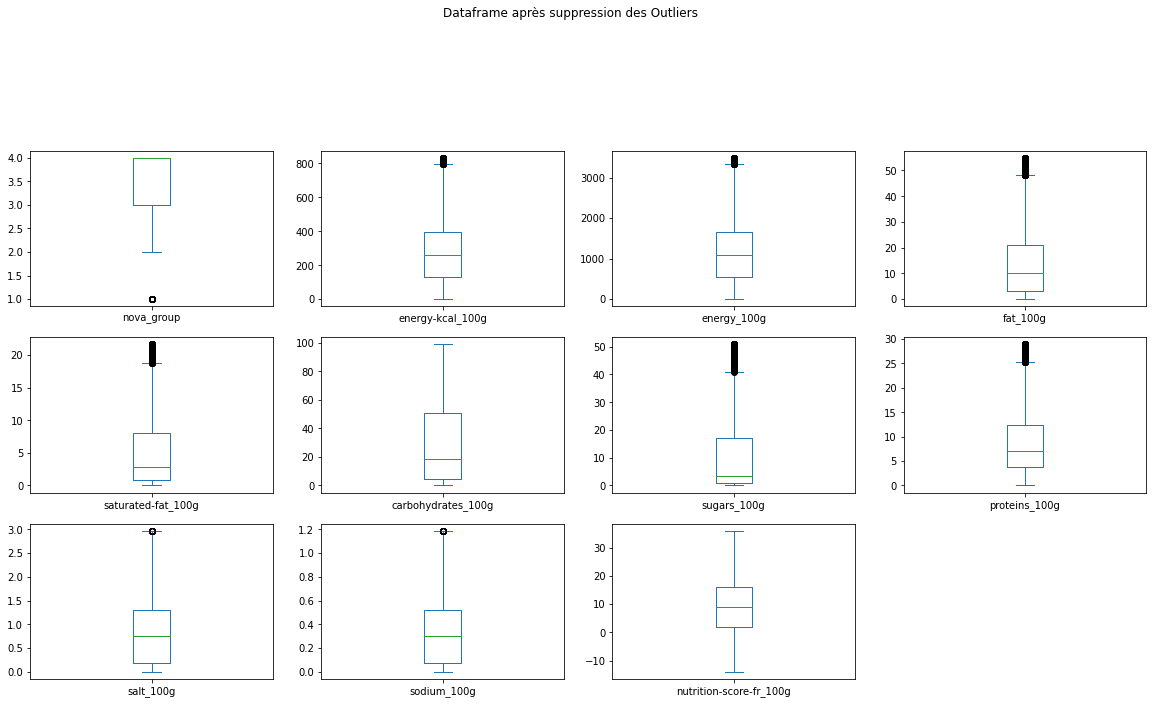

In [39]:
food_at.select_dtypes(include=float).plot(kind='box', subplots=True, title='Dataframe après suppression des Outliers', figsize=(20,20), layout=(6,4))
plt.show()

### Variable categorial  change type and mode() to complete 

In [41]:
food_at.head()

code                                                url  creator  \
2   0000000000017  http://world-en.openfoodfacts.org/product/0000...  kiliweb   
10  0000000000178  http://world-en.openfoodfacts.org/product/0000...  kiliweb   
18  0000000000949  http://world-en.openfoodfacts.org/product/0000...  kiliweb   
19  0000000000970  http://world-en.openfoodfacts.org/product/0000...  kiliweb   
23  0000000001137  http://world-en.openfoodfacts.org/product/0000...  kiliweb   

     created_t          created_datetime  last_modified_t  \
2   1529059080 2018-06-15 10:38:00+00:00       1561463718   
10  1542456332 2018-11-17 12:05:32+00:00       1542456333   
18  1523440813 2018-04-11 10:00:13+00:00       1565268412   
19  1520506368 2018-03-08 10:52:48+00:00       1561463726   
23  1539781575 2018-10-17 13:06:15+00:00       1539781578   

      last_modified_datetime                 product_name countries  \
2  2019-06-25 11:55:18+00:00             Vitória crackers    France   
10 2018-11-17 12:05:33+00:00                    Mini coco    France   
18 2019-08-08 12:46:52+00:00    Salade de carottes râpées    France   
19 2019-06-25 11:55:26+00:00  Fromage blanc aux myrtilles    France   
23 2018-10-17 13:06:18+00:00            Baguette parisien    France   

   countries_tags  ... energy-kcal_100g energy_100g  fat_100g  \
2       en:france  ...            375.0      1569.0       7.0   
10      en:france  ...             60.0       251.0       3.0   
18      en:france  ...             32.0       134.0       0.3   
19      en:france  ...            129.0       540.0       4.9   
23      en:france  ...            222.0       929.0       3.3   

   saturated-fat_100g carbohydrates_100g sugars_100g proteins_100g salt_100g  \
2                3.08               70.1        15.0           7.8     1.400   
10               1.00               10.0         3.0           2.0     1.150   
18               0.10                5.3         3.9           0.9     0.420   
19               3.10               16.3        16.3           4.4     0.250   
23               2.10               38.4         1.8          11.7     0.678   

   sodium_100g nutrition-score-fr_100g  
2       0.5600                     NaN  
10      0.4600                     NaN  
18      0.1680                     1.0  
19      0.1000                     NaN  
23      0.2712                     NaN  

[5 rows x 30 columns]

In [42]:
# Drop des colonnes inutiles pour l'analyse
food_at = food_at.drop(columns=[
    'url',
    'creator',
    'countries',
    'states',
    'states_en',
    'url',
    'pnns_groups_1',
    'pnns_groups_2',
    'image_url',
    'image_small_url',
])


In [43]:
food_at['nova_group'].unique()

array([nan,  4.,  3.,  1.,  2.])

In [44]:
food_at['nova_group'] = food_at['nova_group'].astype('category')

In [45]:
food_at['nova_group'] = food_at['nova_group'].fillna(food_at['nova_group'].mode()[0])

In [46]:
food_at['nova_group'].unique()

C:\Users\utilisateur\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


[4.0, 3.0, 1.0, 2.0]
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

In [47]:
food_at['nutrition-score-fr_100g'].unique()

array([ nan,   1.,  14.,   4.,   0.,  -4.,  15.,  17.,   2.,  22.,   5.,
        23.,  20.,   3.,  19.,  24.,  16.,  18.,  -3.,  13.,  21.,   6.,
        12.,  11.,   7.,  25.,  -6.,  -5.,  -7.,  -1.,   9.,  -2.,  26.,
       -10.,  10.,   8.,  -8.,  29.,  27.,  30., -12.,  -9.,  28.,  31.,
        35.,  33.,  32., -11., -13.,  36., -14.])

In [48]:
food_at['nutrition-score-fr_100g'].isna().sum()

168954

In [49]:
food_at['nutrition-score-fr_100g'].describe()

count    169097.000000
mean          8.854758
std           8.560960
min         -14.000000
25%           2.000000
50%           9.000000
75%          16.000000
max          36.000000
Name: nutrition-score-fr_100g, dtype: float64

### Replace Nan 

In [50]:
food_Nan = food_at.copy()

In [51]:
food_Nan.isna().sum()/ food_Nan.shape[0]

code                       0.000000
created_t                  0.000000
created_datetime           0.000000
last_modified_t            0.000000
last_modified_datetime     0.000000
product_name               0.000000
countries_tags             0.000000
countries_en               0.000000
nutriscore_grade           0.499788
nova_group                 0.000000
states_tags                0.000000
energy-kcal_100g           0.000000
energy_100g                0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
proteins_100g              0.000000
salt_100g                  0.000000
sodium_100g                0.000000
nutrition-score-fr_100g    0.499788
dtype: float64

In [52]:
limite = food_Nan.select_dtypes(float).isna().sum()/ food_Nan.shape[0]

In [53]:
limite

energy-kcal_100g           0.000000
energy_100g                0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
proteins_100g              0.000000
salt_100g                  0.000000
sodium_100g                0.000000
nutrition-score-fr_100g    0.499788
dtype: float64

In [54]:
#limite[limite >= 0.4]

In [55]:
food_Nan.isna().sum()

code                            0
created_t                       0
created_datetime                0
last_modified_t                 0
last_modified_datetime          0
product_name                    0
countries_tags                  0
countries_en                    0
nutriscore_grade           168954
nova_group                      0
states_tags                     0
energy-kcal_100g                0
energy_100g                     0
fat_100g                        0
saturated-fat_100g              0
carbohydrates_100g              0
sugars_100g                     0
proteins_100g                   0
salt_100g                       0
sodium_100g                     0
nutrition-score-fr_100g    168954
dtype: int64

In [56]:
food_Nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338051 entries, 2 to 2033603
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   code                     338051 non-null  object             
 1   created_t                338051 non-null  int64              
 2   created_datetime         338051 non-null  datetime64[ns, UTC]
 3   last_modified_t          338051 non-null  int64              
 4   last_modified_datetime   338051 non-null  datetime64[ns, UTC]
 5   product_name             338051 non-null  object             
 6   countries_tags           338051 non-null  object             
 7   countries_en             338051 non-null  object             
 8   nutriscore_grade         169097 non-null  object             
 9   nova_group               338051 non-null  category           
 10  states_tags              338051 non-null  object             
 11  energy-kcal_

In [57]:
column_means = food_Nan.select_dtypes(float).mean()

In [58]:
column_means

energy-kcal_100g            272.782358
energy_100g                1141.169925
fat_100g                     13.349570
saturated-fat_100g            5.086545
carbohydrates_100g           27.691742
sugars_100g                  10.524756
proteins_100g                 8.805809
salt_100g                     0.846743
sodium_100g                   0.338698
nutrition-score-fr_100g       8.854758
dtype: float64

In [59]:
food_Nan = food_Nan.fillna(column_means)


In [60]:
food_Nan.columns

Index(['code', 'created_t', 'created_datetime', 'last_modified_t',
       'last_modified_datetime', 'product_name', 'countries_tags',
       'countries_en', 'nutriscore_grade', 'nova_group', 'states_tags',
       'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [61]:
food_Nan.shape


(338051, 21)

In [62]:
food_Nan.to_csv('data/nutriscore_french.csv', sep='\t', index=False)

<p style="color:#daae1f;font-size: 16px"> Création d'un csv avec les donnnées nettoyées ,l'exploration sera donc plus facile avec un csv de taille moindre et avec surtout un de donnnées plus approprié. Suite sur le second notebook "analyser_vos_donnees"  </p>